In [3]:
from skimage.morphology import reconstruction
from skimage.morphology import opening

from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [4]:
train_mask_path      = "../data/Training-Dataset/Masks-Ideal/"
train_pred_mask_path = "../data/Training-Dataset/Predicted-Masks/"

valid_mask_path      = "../data/Validation-Dataset/Masks-Ideal/"
valid_pred_mask_path = "../data/Validation-Dataset/Predicted-Masks/"

In [5]:
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images[filename.split('.')[0]] = img  #remove extension from file name
    return images

In [6]:
masks       = load_images_from_folder(train_mask_path)
pred_masks  = load_images_from_folder(train_pred_mask_path)

In [7]:
valid_masks      = load_images_from_folder(valid_mask_path)
valid_pred_masks = load_images_from_folder(valid_pred_mask_path)

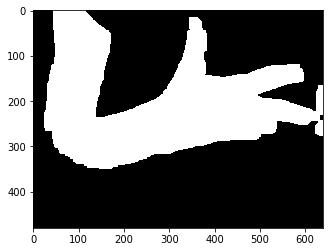

In [8]:
plt.imshow(255-pred_masks['3_P_hgr1_id05_3'])
plt.show()

In [259]:
def handDescomposition(masks, plot=False):
    accuracy = 0
    
    for key in masks.keys():
        #resize image
        mask = masks[key][:,:,0].copy()
        mask = cv2.resize(mask, (512, 512), interpolation = cv2.INTER_AREA)
        mask = mask.clip(max=1)

        #invert color for viz purpose
        mask = 255-masks[key][:,:,0].copy()
        
        hand = opening(mask, np.ones((51,51)))
        
        #top-hat
        fingers = mask-hand
        kernel  = np.ones((3,3), np.uint8) 
        fingers_enh = cv2.erode(fingers, kernel, iterations=6)
        
        #fingers-components above given area-threashold            
        components = cv2.connectedComponentsWithStats(np.uint8(fingers_enh), connectivity=4)
        try:
            thd = min(max(components[2][1:, 4])//2,700)
        except:
            thd = 700
        num_corners = sum(components[2][1:,4]>thd)
            
        if plot:       
            plt.imshow(mask, cmap='gray')
            #plt.show()
            #plt.imshow(fingers, cmap='gray')
            #plt.show()
            #plt.imshow(fingers_enh, cmap='gray')
            plt.savefig("../images/pred_inv.png")
    
        if num_corners == int(key[0]): accuracy += 1
        
    return accuracy/len(masks.keys())

In [248]:
valid_pred_masks.keys()

dict_keys(['2_P_hgr1_id08_2', '2_P_hgr1_id08_3', '2_P_hgr1_id08_1', '2_P_hgr1_id08_4', '3_P_hgr1_id08_2', '3_P_hgr1_id08_3', '3_P_hgr1_id08_1', '5_P_hgr1_id08_1', '5_P_hgr1_id08_2', '5_P_hgr1_id08_3', '4_P_hgr1_id08_1', '1_P_hgr1_id08_2', '1_P_hgr1_id08_3', '4_P_hgr1_id08_2', '1_P_hgr1_id08_1', '4_P_hgr1_id08_3', '3_P_hgr1_id07_1', '4_P_hgr1_id06_1', '1_P_hgr1_id06_2', '1_P_hgr1_id06_3', '3_P_hgr1_id07_2', '4_P_hgr1_id06_2', '1_P_hgr1_id06_1', '4_P_hgr1_id06_3', '3_P_hgr1_id07_3', '2_P_hgr1_id07_1', '5_P_hgr1_id06_1', '2_P_hgr1_id07_2', '5_P_hgr1_id06_2', '5_P_hgr1_id06_3', '2_P_hgr1_id07_3', '1_P_hgr1_id07_1', '4_P_hgr1_id07_2', '3_P_hgr1_id06_2', '3_P_hgr1_id06_3', '4_P_hgr1_id07_3', '1_P_hgr1_id07_2', '4_P_hgr1_id07_1', '3_P_hgr1_id06_1', '1_P_hgr1_id07_3', '5_P_hgr1_id07_2', '2_P_hgr1_id06_2', '2_P_hgr1_id06_3', '5_P_hgr1_id07_3', '5_P_hgr1_id07_1', '2_P_hgr1_id06_1'])

1.0

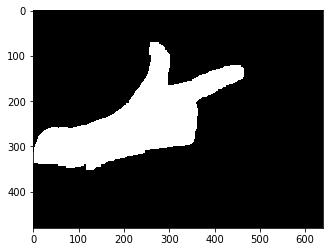

In [260]:
handDescomposition({'2_P_hgr1_id07_1':valid_pred_masks['2_P_hgr1_id07_1']},plot=True)

In [222]:
handDescomposition(masks)

0.8333333333333334

In [223]:
handDescomposition(valid_pred_masks)

0.6739130434782609